# 회귀
- 회귀는 현대 통계학을 이루는 큰 축
- 회귀 분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것

### 회귀의 유형
- 회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러가지 유형으로 나눌 수 있음
- 회귀에서 가장 중요한 것은 회귀계수
- 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있음
- 독립변수의 개수가 한 개인지 여러개인지에 따라 단일 회귀, 다중 회귀로 나뉨

### 선형회귀의 종류
- 일반 선형 회귀 : 예측값과 실제값의 RSS을 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
- 릿지 : 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델
- 라쏘 : 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식
- 엘라스틱넷 : L2, L1 규제를 함께 결합한 모델
- 로지스틱 회귀 : 로지스틱 회귀는 회귀라는 이름이 붙어있지만, 사실은 분류에 사용되는 선형 모델

### RSS(비용함수)
- 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 회귀의 핵심
- RSS는 회귀식의 독립변수, 종속변수가 중심변수가 아니라 회귀계수가 중심변수임을 인지해야함
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 오류값을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류값을 구하는 것.
- 비용함수 = 손실함수

### 비용 최소화하기 - 경사 하강법
- 많은 파라미터가 있는 경우에 경사 하강법은 보다 간단하고 직관적인 비용함수 최소화 솔루션을 제공
- 점진적으로 반복적인 게산을 통해 파라미터 값을 업데이트하면서 오류값이 최소가 되는 파라미터를 구하는 방식
- 예측값과 실제값의 차이가 작아지는 방향성을 가지고 파라미터를 지속해서 보정해 나감
- 더이상 오류값이 작아지지 않으면 그 오류값을 최소비용으로 판단하고 그 때의 값을 최적 파라미터로 반환함

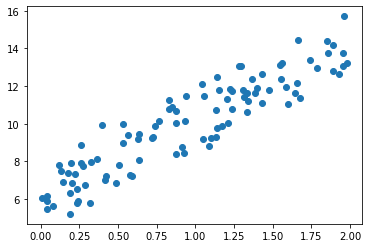

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y = 4X + 6 식을 근사 (w1 =4, w0 = 6). random 값은 Noise를 위해 만듦
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

# X, y 데이터셋 scatter plot으로 시각화
plt.scatter(X, y)

In [3]:
X.shape, y.shape

((100, 1), (100, 1))

In [14]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [15]:
# 입력 인자 iter로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters = 10000):
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [16]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N    # 오차값
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1 : {0:.3f} w0 : {1:.3f}'.format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost : {:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.022 w0 : 6.162
Gradient Descent Total Cost : 0.9935


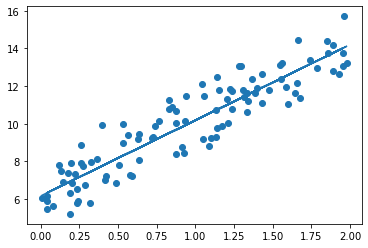

In [17]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### 미니 배치 확률적 경사 하강법

In [18]:
# 샘플링으로 데이터를 추출하여 시간 단축
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 -w0_update

    return w1, w0

In [19]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [20]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1 :', round(w1[0, 0], 3), 'w0 :', round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Dexcent Total Cost : {:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.028 w0 : 6.156
Stochastic Gradient Dexcent Total Cost : 0.9937


## 사이킷런 Linear Regression 클래스

class sklearn.linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)

LinearRegression 클래스는 예측값과 실제값의 RSS를 최소화해 OLS 추정 방식으로 구현한 클래스

## 선형 회귀의 다중 공선성 문제
- 일반적으로 선형회귀는 입력 피처의 독립성에 많은 영향 받음
- 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해지는 현상 => 다중공선성 문제
- 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용

## 회귀의 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것
- R^2 : 분산 기반으로 예측 성능 평가, 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며 1에 가까울수록 예측 정확도가 높음

[67.30998637]


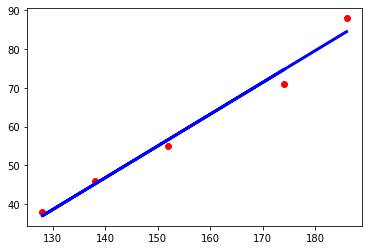

In [2]:
# 인간의 키와 몸무게는 어느정도 비례할 것으로 예상된다. 선형회귀를 이용하여 학습시키고 키다 165cm일 때의 예측값을 얻어보자.
import matplotlib.pyplot as plt
from sklearn import linear_model

reg = linear_model.LinearRegression()

X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]
reg.fit(X, y)

print(reg.predict([[165]]))

# 산포도 그리기
plt.scatter(X, y, color = 'red')

# 예측값 계산
y_pred = reg.predict(X)

plt.plot(X, y_pred, color = 'blue', linewidth = 3)
plt.show()

### 당뇨병 예제

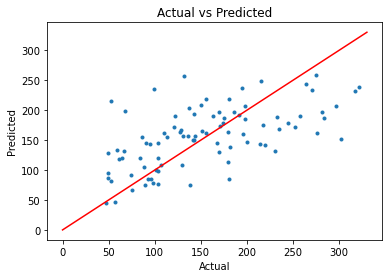

In [5]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

diabetes = datasets.load_diabetes()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, marker='.')
plt.plot([0, 330], [0, 330], color='red')  # 직선 추가

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")

plt.show()

## LinearRegression 이용한 보스턴 주택가격 예측

In [9]:
# 데이터 로드 및 확인
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

# boston 데이터셋 로드
bostonDF = pd.read_csv('../datasets/Boston.csv', index_col=0)

print(bostonDF.shape)
bostonDF.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
bostonDF.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

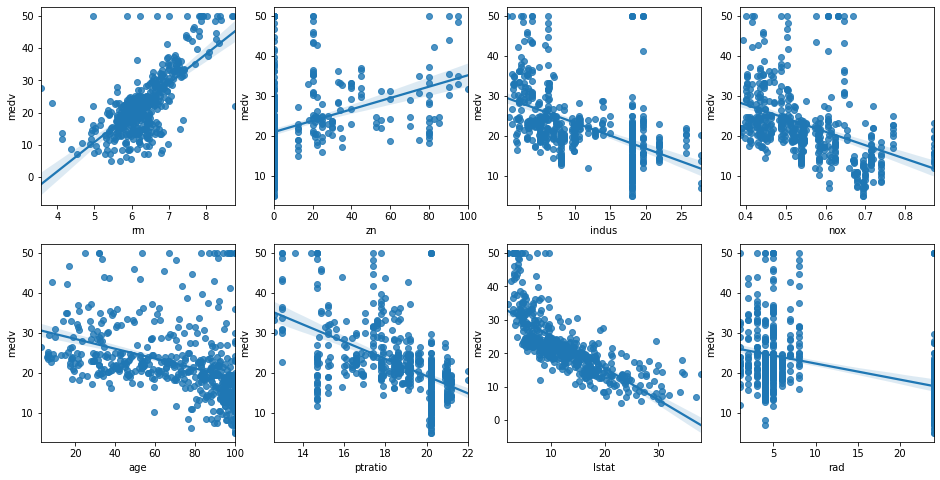

In [15]:
# 피처/타겟값 상관관계 파악 - seaborn 의 regplot 이용하면 산점도와 선형 회귀 직선을 함께 나타내줌

# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4*2개의 ax를 가짐
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['rm', 'zn', 'indus', 'nox', 'age', 'ptratio', 'lstat', 'rad']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # seaborn의 regplor을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x = feature, y = 'medv', data = bostonDF, ax = axs[row][col])

In [16]:
# 학습/테스트 데이터 분리하고 Linear Regression 학습/예측/평가 수행
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['medv']
X_data = bostonDF.drop(['medv'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [17]:
print('절편 값 : ', lr.intercept_)
print('회귀계수 값 :', np.round(lr.coef_, 1))

절편 값 :  40.99559517216477
회귀계수 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [18]:
# 회귀계수가 큰 순서대로 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

rm          3.4
chas        3.0
rad         0.4
zn          0.1
indus       0.0
age         0.0
tax        -0.0
black       0.0
crim       -0.1
lstat      -0.6
ptratio    -0.9
dis        -1.7
nox       -19.8
dtype: float64

In [19]:
# Fold셋으로 교차검증을 수행하여 MSE, RMSE 구하기
from sklearn.model_selection import cross_val_score

y_target = bostonDF['medv']
X_data = bostonDF.drop(['medv'], axis = 1)

# cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds 의 개별 Negartive MSE scores :', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negartive MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores : [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829
